<a href="https://colab.research.google.com/github/risa1796/Forecasting-Regression-exercises/blob/main/E_Commerce_Jewelry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce purchase history from jewelry store

What can I do with this dataset?

- EDA 
- Forecasting total sales 
- Product Recommendation 

## 1. Data Upload

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df_cols = ['Datetime','OrderID','ProductID','Quantity','CategoryID','CategoryCode','BrandID','USDPrice','UserID','Gender','Color','Metal','Gem']
df = pd.read_csv('/content/drive/MyDrive/딥러닝기초/jewelry.csv',names=df_cols )
df.head(2)

,Datetime,OrderID,ProductID,Quantity,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN


## 2. Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   Quantity      95911 non-null  int64  
 4   CategoryID    90559 non-null  float64
 5   CategoryCode  85978 non-null  object 
 6   BrandID       91126 non-null  float64
 7   USDPrice      90559 non-null  float64
 8   UserID        90559 non-null  float64
 9   Gender        47743 non-null  object 
 10  Color         88251 non-null  object 
 11  Metal         90449 non-null  object 
 12  Gem           61853 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [4]:
df.isna().sum()

Datetime            0
OrderID             0
ProductID           0
Quantity            0
CategoryID       5352
CategoryCode     9933
BrandID          4785
USDPrice         5352
UserID           5352
Gender          48168
Color            7660
Metal            5462
Gem             34058
dtype: int64

So many missing values in 'Gender' column. 

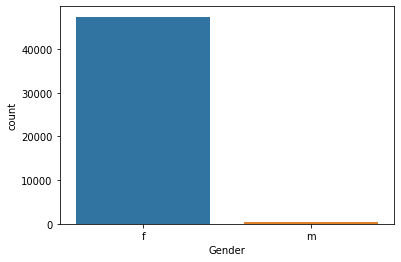

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x = 'Gender')

The majority of customers are female, let's replace the missing value to 'f'.

In [6]:
df.Gender.fillna('f', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   Quantity      95911 non-null  int64  
 4   CategoryID    90559 non-null  float64
 5   CategoryCode  85978 non-null  object 
 6   BrandID       91126 non-null  float64
 7   USDPrice      90559 non-null  float64
 8   UserID        90559 non-null  float64
 9   Gender        95911 non-null  object 
 10  Color         88251 non-null  object 
 11  Metal         90449 non-null  object 
 12  Gem           61853 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [7]:
df.Quantity.unique()

array([1])

Since there is only one single value in the 'Quantity' feature. We will remove the column.

In [8]:
df.drop('Quantity',axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      95911 non-null  object 
 1   OrderID       95911 non-null  int64  
 2   ProductID     95911 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  85978 non-null  object 
 5   BrandID       91126 non-null  float64
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        95911 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 8.8+ MB


## EDA

In [9]:
pd.set_option('float_format', '{:f}'.format)

In [10]:
df.head()

,Datetime,OrderID,ProductID,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1806829201890738432.000000,jewelry.earring,0.000000,561.510000,1515915625207851264.000000,f,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1806829201848795392.000000,NaN,NaN,212.140000,1515915625071970048.000000,f,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1806829201915904256.000000,jewelry.pendant,1.000000,54.660000,1515915625048493568.000000,f,white,gold,sapphire
3,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1806829201915904256.000000,jewelry.pendant,0.000000,88.900000,1515915625207630848.000000,f,red,gold,diamond
4,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1806829201924292864.000000,jewelry.necklace,0.000000,417.670000,1515915625175329280.000000,f,red,gold,amethyst


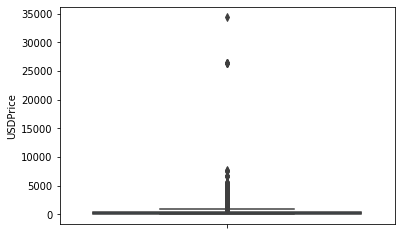

In [11]:
sns.boxplot(data= df, y='USDPrice')

In [12]:
df.USDPrice.describe()

count   90559.000000
mean      362.215217
std       444.155706
min         0.990000
25%       145.620000
50%       258.770000
75%       431.370000
max     34448.600000
Name: USDPrice, dtype: float64

In [13]:
df.USDPrice.isna().sum()

5352

In [14]:
uq = df.USDPrice.quantile(0.99)
uq

1979.03

In [15]:
df[df['USDPrice']>= uq].Gem.value_counts()

diamond         315
topaz           139
mix             123
amethyst         51
garnet           49
pearl            38
fianit           31
sitall            6
quartz            5
rhodolite         5
quartz_smoky      2
Name: Gem, dtype: int64

Fill missing value in price by average price by its brand, metal and Gem ...?

In [16]:
print(df[df['USDPrice'].isna()].Gem.unique())
print(df[df['USDPrice'].isna()].Metal.unique())
print(df[df['USDPrice'].isna()].BrandID.unique())

[nan]
[nan]
[1.55061295e+18 1.32515621e+18 1.51591563e+18 ... 1.51591563e+18
 1.51591563e+18 1.51591563e+18]


In [17]:
df[df['USDPrice'].isna()].BrandID.value_counts()

1515915625535747840.000000    147
1515915625081825280.000000    104
1515915625216376320.000000     74
1515915625619533568.000000     37
1515915625368881664.000000     34
                             ... 
1515915625682310912.000000      1
1515915625679514880.000000      1
1515915625373777408.000000      1
1515915625613576448.000000      1
1515915625720366080.000000      1
Name: BrandID, Length: 2530, dtype: int64

In [18]:
df[df['BrandID']==1515915625368881664.000000].describe()

,OrderID,ProductID,CategoryID,BrandID,USDPrice,UserID
count,34.000000,34.000000,0.000000,34.000000,0.000000,0.000000
mean,2638979924018578944.000000,1511337375836665856.000000,NaN,1515915625368881408.000000,NaN,NaN
std,34438348769851152.000000,26990588771357548.000000,NaN,259.849840,NaN,NaN
min,2532275520217808896.000000,1358585398883779328.000000,NaN,1515915625368881664.000000,NaN,NaN
25%,2625246049077298176.000000,1515966223606762496.000000,NaN,1515915625368881664.000000,NaN,NaN
50%,2657494834419335168.000000,1515966223621531392.000000,NaN,1515915625368881664.000000,NaN,NaN
75%,2661770150176359424.000000,1515966223638561792.000000,NaN,1515915625368881664.000000,NaN,NaN
max,2676981097727788032.000000,1515966223669781504.000000,NaN,1515915625368881664.000000,NaN,NaN


There is Order ID but no price and no userID ??

In [19]:
df[df['BrandID']==1515915625368881664.000000].OrderID.value_counts()

2661770150176359277    3
2665422882917581046    2
2663366421915894689    2
2657578846991156144    2
2657494834419335412    2
2532275520217808963    1
2566997738944200728    1
2663181734790562674    1
2662694226927551305    1
2660248960353960202    1
2658367824346480656    1
2658276613703074266    1
2657627215042184020    1
2651104759326442045    1
2650322754682749666    1
2650176332201198286    1
2645320018719408273    1
2640809570422751865    1
2636560264383693385    1
2630558319160328878    1
2623475292382954429    1
2619032204910527177    1
2615576884670365952    1
2603973600042025669    1
2601118982693978701    1
2578477659352728151    1
2569123418611909466    1
2676981097727787987    1
Name: OrderID, dtype: int64

In [20]:
df[df['OrderID']==2661770150176359277]

,Datetime,OrderID,ProductID,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
77632,2021-09-13 10:09:10 UTC,2661770150176359277,1515966223615277979,NaN,231.51,1515915625368881664.000000,NaN,NaN,f,NaN,NaN,NaN
77633,2021-09-13 10:09:10 UTC,2661770150176359277,1515966223615277979,NaN,231.51,1515915625368881664.000000,NaN,NaN,f,NaN,NaN,NaN
77634,2021-09-13 10:09:10 UTC,2661770150176359277,1515966223622635199,NaN,0.00,1515915625368881664.000000,NaN,NaN,f,NaN,NaN,NaN


Let's delete rows with missing values in USDPrice and UserID, becaus they seem meaningless.

In [21]:
new_df = df[df['USDPrice'].notna() & df['UserID'].notna()]

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  80626 non-null  object 
 5   BrandID       85774 non-null  float64
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 9.0+ MB


In [23]:
new_df.CategoryCode.fillna('other', inplace=True)

In [24]:
new_df.CategoryCode.value_counts()

jewelry.earring       29052
jewelry.ring          28300
jewelry.pendant       13088
other                  9933
jewelry.bracelet       6188
jewelry.necklace       2361
jewelry.brooch         1288
jewelry.souvenir        170
electronics.clocks      167
jewelry.stud             12
Name: CategoryCode, dtype: int64

In [25]:
new_df[new_df['BrandID'].isna()].USDPrice.mean()

343.4119937304076

In [26]:
new_df['BrandID'].fillna('-1',inplace=True)

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  90559 non-null  object 
 5   BrandID       90559 non-null  object 
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         88251 non-null  object 
 10  Metal         90449 non-null  object 
 11  Gem           61853 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 9.0+ MB


In [28]:
new_df['Gem'].unique()

array(['diamond', nan, 'sapphire', 'amethyst', 'fianit', 'pearl',
       'quartz', 'topaz', 'garnet', 'quartz_smoky', 'ruby', 'agate',
       'mix', 'citrine', 'emerald', 'amber', 'chrysolite', 'chrysoprase',
       'nanocrystal', 'turquoise', 'sitall', 'corundum_synthetic',
       'coral', 'onyx', 'nacre', 'spinel', 'tourmaline',
       'emerald_geothermal', 'garnet_synthetic', 'rhodolite',
       'sapphire_geothermal'], dtype=object)

In [29]:
for i in ('Color','Metal','Gem'):
  if i == 'Color':
    new_df[i].fillna('unknown-color',inplace=True)
  else:
    new_df[i].fillna('unknown',inplace=True)

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Datetime      90559 non-null  object 
 1   OrderID       90559 non-null  int64  
 2   ProductID     90559 non-null  int64  
 3   CategoryID    90559 non-null  float64
 4   CategoryCode  90559 non-null  object 
 5   BrandID       90559 non-null  object 
 6   USDPrice      90559 non-null  float64
 7   UserID        90559 non-null  float64
 8   Gender        90559 non-null  object 
 9   Color         90559 non-null  object 
 10  Metal         90559 non-null  object 
 11  Gem           90559 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 9.0+ MB


red              69511
white            15286
yellow            3388
unknown-color     2372
black                2
Name: Color, dtype: int64


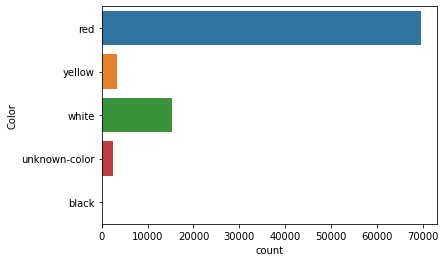

In [31]:
print(new_df.Color.value_counts())
sns.countplot(y ='Color', data = new_df)

gold        89082
silver       1365
unknown       110
platinum        2
Name: Metal, dtype: int64


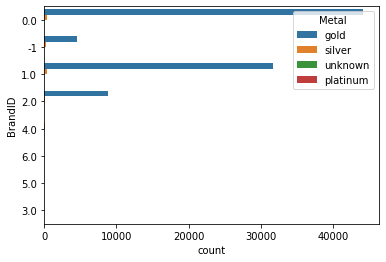

In [32]:
print(new_df.Metal.value_counts())
sns.countplot(y ='BrandID', hue = "Metal", data = new_df)

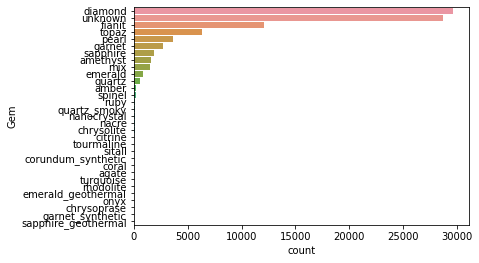

In [33]:
sns.countplot(data = new_df, y = 'Gem', order = new_df['Gem'].value_counts().index)

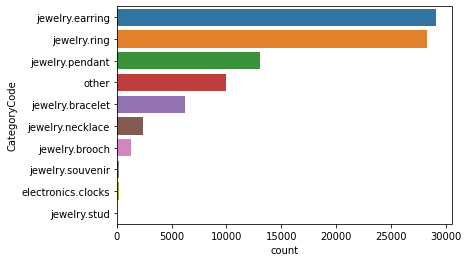

In [34]:
sns.countplot(data = new_df, y = 'CategoryCode', order = new_df['CategoryCode'].value_counts().index)

0.0    44600
1.0    32022
2.0     8966
-1      4785
4.0       65
3.0       58
6.0       56
5.0        7
Name: BrandID, dtype: int64


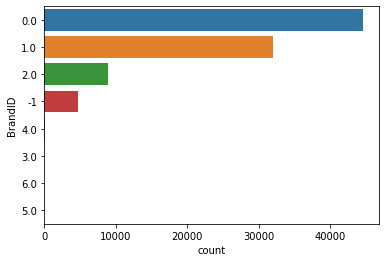

In [35]:
print(new_df.BrandID.value_counts())
sns.countplot(data = new_df, y = 'BrandID', order = new_df['BrandID'].value_counts().index)

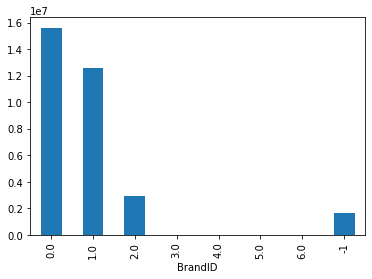

In [36]:
new_df.groupby('BrandID').USDPrice.sum().plot.bar()

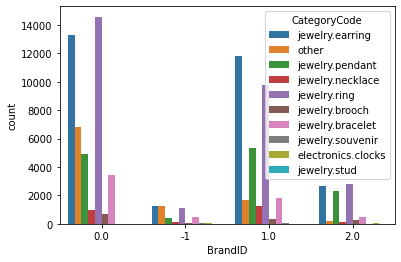

In [37]:
sns.countplot(x ='BrandID', hue = "CategoryCode", data = new_df[new_df['BrandID'].astype(int)<= 2])

## Forecasting total sales 

In [38]:
new_df['Datetime'] = new_df.Datetime.apply(lambda x : x[:10])
new_df.head()

,Datetime,OrderID,ProductID,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01,1924719191579951782,1842195256808833386,1806829201890738432.000000,jewelry.earring,0.000000,561.510000,1515915625207851264.000000,f,red,gold,diamond
1,2018-12-01,1924899396621697920,1806829193678291446,1806829201848795392.000000,other,-1,212.140000,1515915625071970048.000000,f,yellow,gold,unknown
2,2018-12-02,1925511016616034733,1842214461889315556,1806829201915904256.000000,jewelry.pendant,1.000000,54.660000,1515915625048493568.000000,f,white,gold,sapphire
3,2018-12-02,1925626951238681511,1835566849434059453,1806829201915904256.000000,jewelry.pendant,0.000000,88.900000,1515915625207630848.000000,f,red,gold,diamond
4,2018-12-02,1925740842841014667,1873936840742928865,1806829201924292864.000000,jewelry.necklace,0.000000,417.670000,1515915625175329280.000000,f,red,gold,amethyst


In [39]:
from datetime import datetime

new_df['Datetime'] = new_df['Datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90559 entries, 0 to 95910
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Datetime      90559 non-null  datetime64[ns]
 1   OrderID       90559 non-null  int64         
 2   ProductID     90559 non-null  int64         
 3   CategoryID    90559 non-null  float64       
 4   CategoryCode  90559 non-null  object        
 5   BrandID       90559 non-null  object        
 6   USDPrice      90559 non-null  float64       
 7   UserID        90559 non-null  float64       
 8   Gender        90559 non-null  object        
 9   Color         90559 non-null  object        
 10  Metal         90559 non-null  object        
 11  Gem           90559 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 11.0+ MB


In [40]:
new_df.head()

,Datetime,OrderID,ProductID,CategoryID,CategoryCode,BrandID,USDPrice,UserID,Gender,Color,Metal,Gem
0,2018-12-01,1924719191579951782,1842195256808833386,1806829201890738432.000000,jewelry.earring,0.000000,561.510000,1515915625207851264.000000,f,red,gold,diamond
1,2018-12-01,1924899396621697920,1806829193678291446,1806829201848795392.000000,other,-1,212.140000,1515915625071970048.000000,f,yellow,gold,unknown
2,2018-12-02,1925511016616034733,1842214461889315556,1806829201915904256.000000,jewelry.pendant,1.000000,54.660000,1515915625048493568.000000,f,white,gold,sapphire
3,2018-12-02,1925626951238681511,1835566849434059453,1806829201915904256.000000,jewelry.pendant,0.000000,88.900000,1515915625207630848.000000,f,red,gold,diamond
4,2018-12-02,1925740842841014667,1873936840742928865,1806829201924292864.000000,jewelry.necklace,0.000000,417.670000,1515915625175329280.000000,f,red,gold,amethyst


In [41]:
sales_df =  pd.pivot_table(new_df, 
                 index= 'Datetime' ,
                 values= 'USDPrice'  ,
                 aggfunc= 'sum' ).reset_index()

sales_df.head()

,Datetime,USDPrice
0,2018-12-01,773.650000
1,2018-12-02,897.470000
2,2018-12-03,978.850000
3,2018-12-04,3486.050000
4,2018-12-05,1246.580000


In [42]:
sales_df.sort_values('Datetime',inplace=True)

In [43]:
import numpy as np

# sns.regplot cant read date type in x so ....
sales_df['Time'] = np.arange(len(sales_df.index))

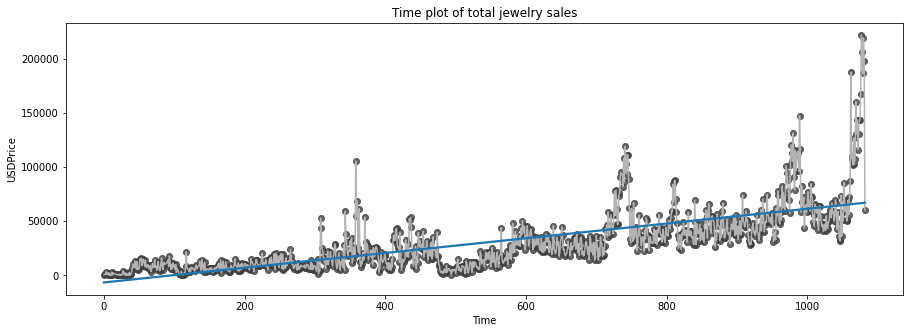

In [44]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(sales_df['Time'], sales_df["USDPrice"],  color='0.7')
ax = sns.regplot(sales_df['Time'], sales_df["USDPrice"],  ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time plot of total jewelry sales');

In [45]:
print(f'Total number of days in sales_df: {sales_df.Time.max()} days')

Total number of days in sales_df: 1082 days


print the firest 5 rows and the last 5 rows in sales_df.

In [46]:
display(sales_df.head())
display(sales_df.tail())

,Datetime,USDPrice,Time
0,2018-12-01,773.650000,0
1,2018-12-02,897.470000,1
2,2018-12-03,978.850000,2
3,2018-12-04,3486.050000,3
4,2018-12-05,1246.580000,4


,Datetime,USDPrice,Time
1078,2021-11-27,206071.700000,1078
1079,2021-11-28,186474.590000,1079
1080,2021-11-29,219555.010000,1080
1081,2021-11-30,197417.900000,1081
1082,2021-12-01,60113.200000,1082


What happened to the total sales in 2021-12-01 ?? 

In [47]:
sales_df.drop('Time',axis=1,inplace=True)

In [48]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [49]:
window = 30
lag = 60
series = series_to_supervised(sales_df.drop('Datetime', axis=1), window=window, lag=lag)
series.head()

,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t),USDPrice(t+60)
30,773.650000,897.470000,978.850000,3486.050000,1246.580000,1922.620000,442.600000,2589.260000,458.070000,68.360000,...,1234.010000,266.990000,45.120000,948.840000,616.300000,4318.760000,3234.170000,642.990000,2355.890000,12764.490000
31,897.470000,978.850000,3486.050000,1246.580000,1922.620000,442.600000,2589.260000,458.070000,68.360000,212.140000,...,266.990000,45.120000,948.840000,616.300000,4318.760000,3234.170000,642.990000,2355.890000,42.310000,14353.130000
32,978.850000,3486.050000,1246.580000,1922.620000,442.600000,2589.260000,458.070000,68.360000,212.140000,3064.280000,...,45.120000,948.840000,616.300000,4318.760000,3234.170000,642.990000,2355.890000,42.310000,1909.460000,8185.480000
33,3486.050000,1246.580000,1922.620000,442.600000,2589.260000,458.070000,68.360000,212.140000,3064.280000,313.430000,...,948.840000,616.300000,4318.760000,3234.170000,642.990000,2355.890000,42.310000,1909.460000,51.920000,17748.040000
34,1246.580000,1922.620000,442.600000,2589.260000,458.070000,68.360000,212.140000,3064.280000,313.430000,2443.000000,...,616.300000,4318.760000,3234.170000,642.990000,2355.890000,42.310000,1909.460000,51.920000,1045.020000,12493.570000


In [50]:
from sklearn.model_selection import train_test_split

lag_size= lag

# Label
labels_col = 'USDPrice(t+%d)' % lag_size
labels = series[labels_col]
series = series.drop(labels_col, axis=1)

X_train, X_valid, Y_train, Y_valid = train_test_split(series, labels.values, test_size=0.4, random_state=0)
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)
X_train.head()

Train set shape (595, 31)
Validation set shape (398, 31)


,USDPrice(t-30),USDPrice(t-29),USDPrice(t-28),USDPrice(t-27),USDPrice(t-26),USDPrice(t-25),USDPrice(t-24),USDPrice(t-23),USDPrice(t-22),USDPrice(t-21),...,USDPrice(t-9),USDPrice(t-8),USDPrice(t-7),USDPrice(t-6),USDPrice(t-5),USDPrice(t-4),USDPrice(t-3),USDPrice(t-2),USDPrice(t-1),USDPrice(t)
526,3978.230000,5259.460000,5101.110000,5521.410000,1850.720000,6757.140000,9063.520000,14728.940000,4742.640000,8048.290000,...,5489.870000,2180.140000,5654.460000,10942.010000,12686.270000,10776.000000,2912.090000,11885.350000,12606.050000,7551.930000
902,56640.120000,46105.870000,45884.080000,45377.390000,31968.810000,50524.920000,35071.470000,59124.200000,66650.170000,47554.090000,...,45852.040000,42232.110000,53193.760000,52833.430000,36891.300000,55772.880000,37628.470000,45470.680000,44576.930000,33107.430000
615,40586.510000,28532.890000,28065.770000,31925.340000,28368.230000,27456.520000,36760.990000,26891.340000,43616.720000,37458.920000,...,41152.210000,42834.540000,37652.990000,35512.780000,23751.100000,34862.390000,26388.110000,28464.220000,30884.690000,35226.870000
420,16871.550000,3096.050000,6142.440000,14339.820000,21635.220000,14365.010000,11681.560000,13325.970000,13536.540000,19876.050000,...,32540.770000,36928.010000,32365.000000,32294.650000,42521.290000,43495.290000,29241.440000,25729.260000,26129.960000,12455.740000
622,26891.340000,43616.720000,37458.920000,50490.730000,44713.400000,39494.030000,45530.870000,23822.300000,35982.080000,36959.990000,...,28464.220000,30884.690000,35226.870000,28048.680000,29778.820000,34356.820000,25638.350000,23223.120000,25539.970000,35169.580000


In [51]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error

In [52]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (595, 31, 1)
Validation set shape (398, 31, 1)


In [60]:
epochs = 200
batch = 65
lr = 0.0005
adam = optimizers.Adamax()

In [61]:
from tensorflow.keras.layers import Dropout

model_lstm = Sequential()
model_lstm.add(LSTM(165,activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(56))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mae', optimizer=adam)
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 165)               110220    
                                                                 
 dropout_2 (Dropout)         (None, 165)               0         
                                                                 
 dense_2 (Dense)             (None, 56)                9296      
                                                                 
 dropout_3 (Dropout)         (None, 56)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 57        
                                                                 
Total params: 119,573
Trainable params: 119,573
Non-trainable params: 0
_________________________________________________________________


In [62]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

lstm_history = model_lstm.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), epochs=epochs, verbose=2, callbacks=[callback])

Epoch 1/200
19/19 - 3s - loss: 27666.6484 - val_loss: 21837.3008 - 3s/epoch - 161ms/step
Epoch 2/200
19/19 - 1s - loss: 25796.4004 - val_loss: 19831.2520 - 1s/epoch - 62ms/step
Epoch 3/200
19/19 - 1s - loss: 23086.6934 - val_loss: 19044.6426 - 1s/epoch - 64ms/step
Epoch 4/200
19/19 - 1s - loss: 22510.3809 - val_loss: 16817.5469 - 1s/epoch - 61ms/step
Epoch 5/200
19/19 - 1s - loss: 20684.7090 - val_loss: 16932.7090 - 1s/epoch - 60ms/step
Epoch 6/200
19/19 - 1s - loss: 20618.0684 - val_loss: 16304.4307 - 1s/epoch - 60ms/step
Epoch 7/200
19/19 - 1s - loss: 20846.9707 - val_loss: 16934.6074 - 1s/epoch - 59ms/step
Epoch 8/200
19/19 - 1s - loss: 20883.9727 - val_loss: 16609.1738 - 1s/epoch - 59ms/step
Epoch 9/200
19/19 - 1s - loss: 18868.5977 - val_loss: 16383.5527 - 1s/epoch - 60ms/step
Epoch 10/200
19/19 - 1s - loss: 19307.8438 - val_loss: 16496.5859 - 1s/epoch - 60ms/step
Epoch 11/200
19/19 - 1s - loss: 20596.3613 - val_loss: 17058.8281 - 1s/epoch - 60ms/step
Epoch 12/200
19/19 - 1s - los

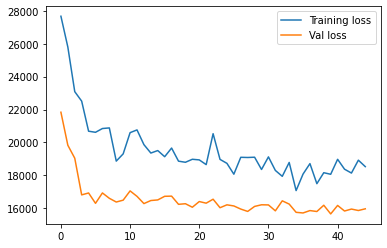

In [63]:
plt.plot(lstm_history.history['loss'], label="Training loss")
plt.plot(lstm_history.history['val_loss'], label="Val loss")
plt.legend()

In [64]:
lstm_train_pred = model_lstm.predict(X_train_series)
lstm_valid_pred = model_lstm.predict(X_valid_series)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_valid_pred)))

13/13 [==============================] - 0s 22ms/step
Train rmse: 24140.333065686962
Validation rmse: 24824.678306919297


In [65]:
length = len(lstm_valid_pred) 

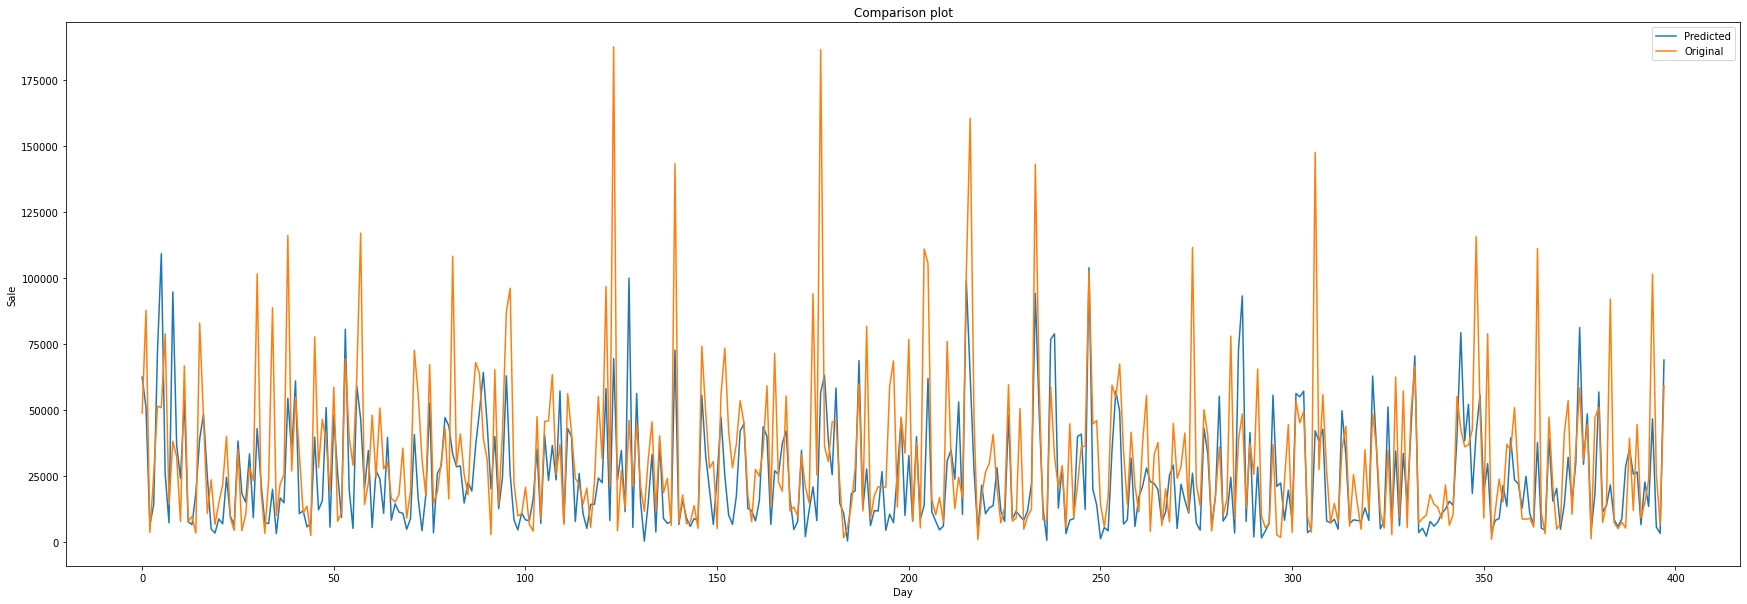

In [77]:
# importing the modules
import numpy as np
import matplotlib.pyplot as plt
 
# data to be plotted
x = np.arange(0, length)
y1 = lstm_valid_pred[:length]
y2 = Y_valid[:length]

plt.figure(figsize=(30, 10))

# plotting
plt.title("Comparison plot")
plt.xlabel("Day")
plt.ylabel("Sale")
plt.plot(x, y1.reshape(-1), label = "Predicted")
plt.plot(x, y2.reshape(-1), label = "Original")
plt.legend()
plt.show()